In [1]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'/Users/daviddangol/Desktop/CSE /data /issue txn details 2026-02-17 09.47.34.xlsx')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Created Date              71635 non-null  object 
 1   Token                     71635 non-null  int64  
 2   Ticket_type               71635 non-null  object 
 3   Issue_Type                71635 non-null  object 
 4   Txn/Issue Date            71635 non-null  object 
 5   Txn Code                  24295 non-null  object 
 6   Txn_Status                71635 non-null  object 
 7   child_txn                 6392 non-null   object 
 8   serviceName               71635 non-null  object 
 9   product_category          21106 non-null  object 
 10  severity                  71635 non-null  object 
 11  esewaId                   71635 non-null  object 
 12  Account_id                71635 non-null  int64  
 13  Profile                   70855 non-null  object 
 14  Gender

In [4]:
date_columns = ['Created Date', 'Txn/Issue Date', 'Updated Date', 'Last Login Date', 'Wallet last updated date', 'first_respose_date_time', 'last_notify']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

object_columns = ['Token', 'Account_id', 'Age']
for col in object_columns:
    df[col] = df[col].astype(str)

df.info()

/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/ipykernel_8848/704069277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/ipykernel_8848/704069277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/ipykernel_8848/704069277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71635 entries, 0 to 71634
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Created Date              71635 non-null  datetime64[ns]
 1   Token                     71635 non-null  object        
 2   Ticket_type               71635 non-null  object        
 3   Issue_Type                71635 non-null  object        
 4   Txn/Issue Date            71635 non-null  datetime64[ns]
 5   Txn Code                  24295 non-null  object        
 6   Txn_Status                71635 non-null  object        
 7   child_txn                 6392 non-null   object        
 8   serviceName               71635 non-null  object        
 9   product_category          21106 non-null  object        
 10  severity                  71635 non-null  object        
 11  esewaId                   71635 non-null  object        
 12  Account_id        

In [5]:
df['Profile'].value_counts()

Profile
User    70855
Name: count, dtype: int64

In [6]:
df = df[df['Profile'] != ('Agent')]
print("Shape of df_admin after removing 'agent' profile rows:", df.shape)

Shape of df_admin after removing 'agent' profile rows: (71635, 33)


In [7]:
df['Ticket_type'].value_counts()

Ticket_type
admin            46146
inapp            25230
Fund_transfer      259
Name: count, dtype: int64

In [8]:
df_copy = df.copy()

In [10]:
df_admin = df_copy[df_copy['Ticket_type'] == 'admin']
df_inapp = df_copy[df_copy['Ticket_type'] == 'inapp']
df_fund_transfer = df_copy[df_copy['Ticket_type'] == 'Fund_transfer']

print("Shape of df_admin:", df_admin.shape)
print("Shape of df_inapp:", df_inapp.shape)
print("Shape of df_fund_transfer:", df_fund_transfer.shape)

Shape of df_admin: (46146, 33)
Shape of df_inapp: (25230, 33)
Shape of df_fund_transfer: (259, 33)


In [11]:
df_admin['Issue_Type'].value_counts()

Issue_Type
Inquiry        35303
Transaction     8224
Bank Load       2619
Name: count, dtype: int64

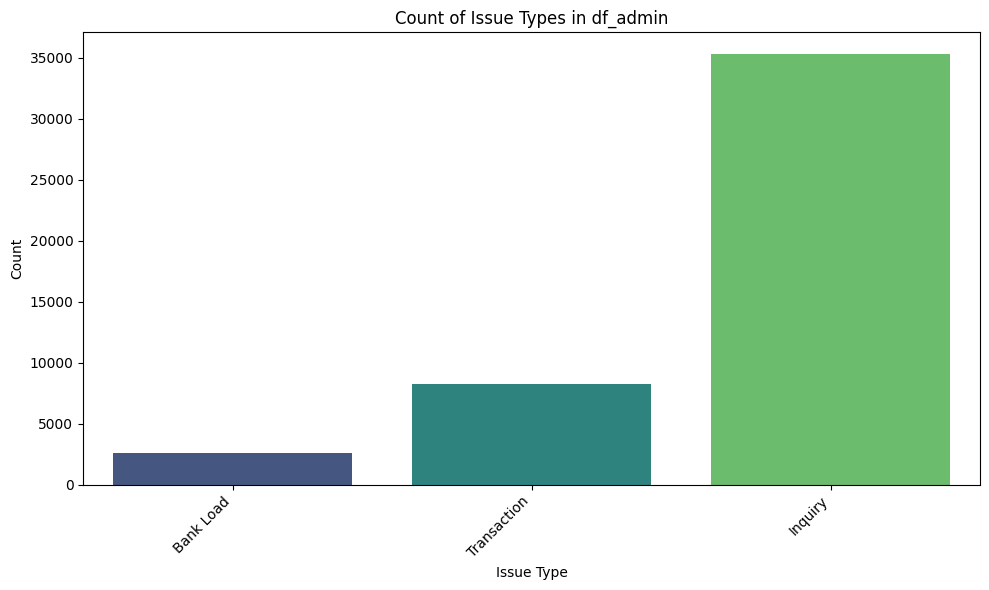

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_admin, x='Issue_Type', hue='Issue_Type', palette='viridis', legend=False)
plt.title('Count of Issue Types in df_admin')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Convert columns to datetime objects
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Wallet last updated date'] = pd.to_datetime(df['Wallet last updated date'])



In [14]:
df['is_churn_risk'] = df['Wallet last updated date'] <= df['Created Date']

In [18]:
import datetime

# Define the maximum date as specified by the user
max_date = df['Created Date'].max()

# Calculate days elapsed for churn-risk users
df.loc[df['is_churn_risk'] == True, 'days_since_created_if_churn'] = (max_date - df['Wallet last updated date']).dt.days

# Define bins and labels for churn days categories
bins = [0, 10, 30, 60, float('inf')]
labels = ['0-10', '11-30', '31-60', '60+'] # Note: '30-60' implies up to 60, so '31-60' for clarity if 30 is exclusive in the next bin.

# Create the new 'churn_days_category' column
df['churn_days_category'] = pd.cut(df['days_since_created_if_churn'], bins=bins, labels=labels, right=True, include_lowest=True)
df['churn_days_category'] = df['churn_days_category'].astype(str)  # Convert to string for better display
# Display some rows to check the new column, focusing on churn-risk users
display(df[df['is_churn_risk'] == True][['Created Date', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category']].head())
# Display value counts for the new category column to verify
display(df['churn_days_category'].value_counts(dropna=False))

,Created Date,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category
25,2026-02-02 11:16:27,2022-09-13 08:31:34,True,1252.0,60+
39,2026-02-02 13:10:09,2026-02-01 01:09:55,True,15.0,11-30
120,2026-02-03 11:49:07,2026-01-31 12:19:29,True,16.0,11-30
124,2026-02-03 11:51:39,2026-02-02 12:11:41,True,14.0,11-30
155,2026-02-03 12:03:27,2023-05-01 09:45:11,True,1022.0,60+


churn_days_category
nan      53307
0-10      6649
60+       6343
11-30     4270
31-60     1066
Name: count, dtype: int64

In [19]:
df_churn_risk = df[df['is_churn_risk'] == True][['Created Date','Account_id','Gender','Age','serviceName','description', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category', 'Issue_Type']]
display(df_churn_risk.head())

,Created Date,Account_id,Gender,Age,serviceName,description,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category,Issue_Type
25,2026-02-02 11:16:27,6999332,M,31.0,Load From GLOBAL IME BANK LTD.,Description:amount not updated (informed TAT )...,2022-09-13 08:31:34,True,1252.0,60+,Bank Load
39,2026-02-02 13:10:09,11642785,M,38.0,Load From HIMALAYAN BANK LTD.,Description:amount not updated::Channel:Mobile...,2026-02-01 01:09:55,True,15.0,11-30,Bank Load
120,2026-02-03 11:49:07,836254,M,24.0,Load From NEPAL INVESTMENT MEGA BANK LTD.,Description:amount not updated::Channel:Mobile...,2026-01-31 12:19:29,True,16.0,11-30,Bank Load
124,2026-02-03 11:51:39,4993557,M,30.0,Load From RASTRIYA BANIJYA BANK LTD.,Description: CLIENT_TRANSACTION_ISSUE::Channel...,2026-02-02 12:11:41,True,14.0,11-30,Bank Load
155,2026-02-03 12:03:27,2890829,F,66.0,Load From NABIL BANK LTD.,Description:Amount not updated 250+250=500::Ch...,2023-05-01 09:45:11,True,1022.0,60+,Bank Load


In [20]:
df_churn_risk.to_csv(r'/Users/daviddangol/Desktop/CSE /admin/df_churn_risk_till_17feb.csv', index=False)
print('DataFrame df_churn_risk saved to df_churn_risk.csv')

DataFrame df_churn_risk saved to df_churn_risk.csv


In [21]:
issue_type_counts = df_churn_risk['Issue_Type'].value_counts()
issue_type_percentage = df_churn_risk['Issue_Type'].value_counts(normalize=True) * 100

issue_type_summary = pd.DataFrame({
    'Count': issue_type_counts,
    'Percentage': issue_type_percentage
})

display(issue_type_summary.round(2))

,Count,Percentage
Issue_Type,,
Inquiry,16046,87.55
Transaction,1931,10.54
Login_credential,215,1.17
Bank Load,136,0.74


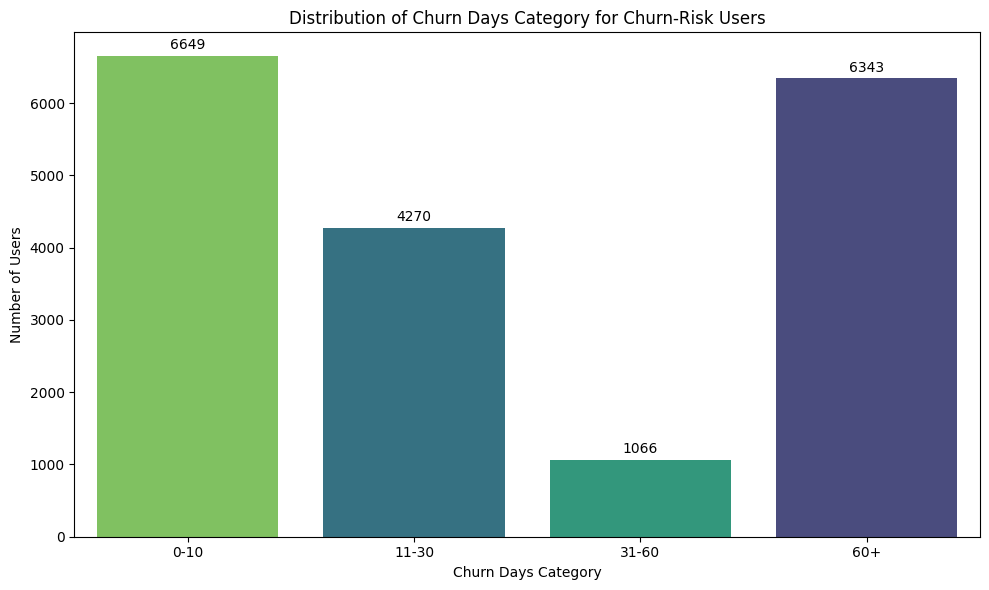

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_churn_risk, x='churn_days_category', hue='churn_days_category', palette='viridis', legend=False, order=['0-10', '11-30', '31-60', '60+'])
plt.title('Distribution of Churn Days Category for Churn-Risk Users')
plt.xlabel('Churn Days Category')
plt.ylabel('Number of Users')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

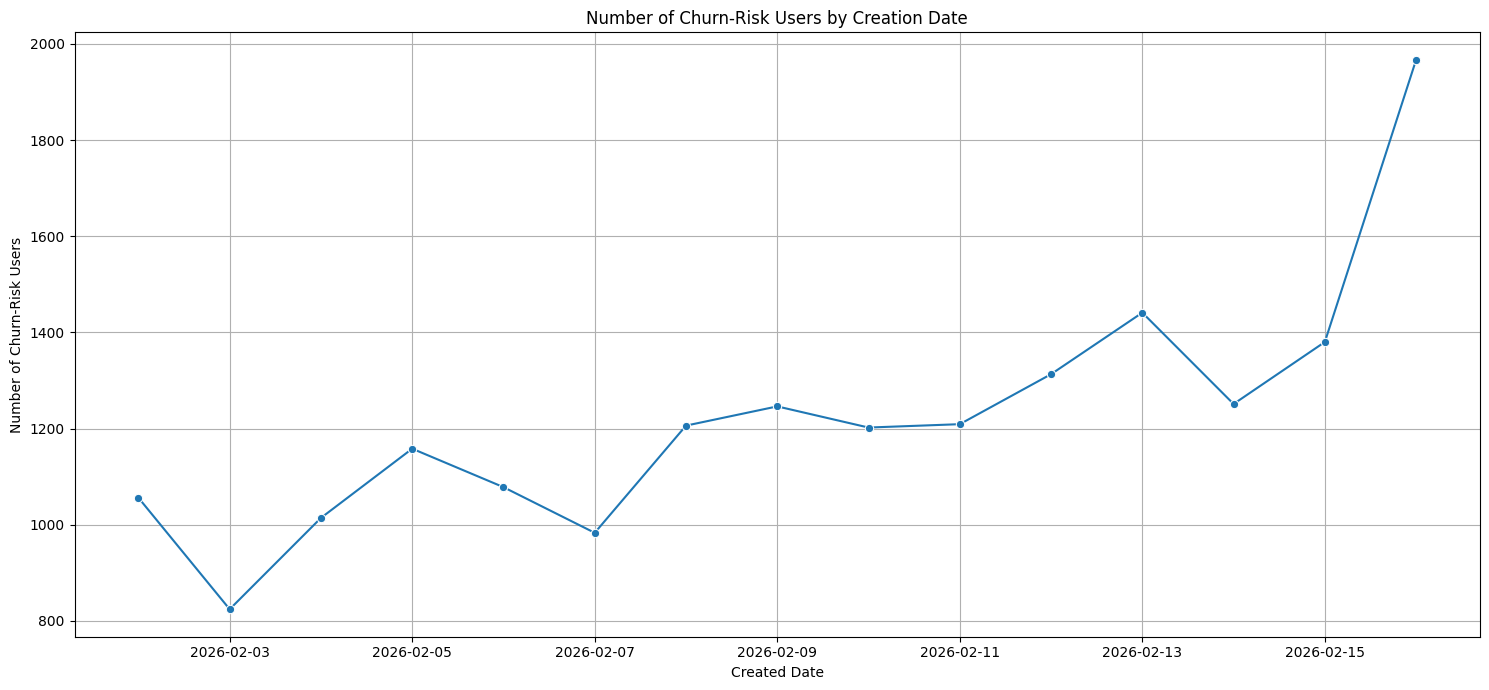

In [23]:
# Group by 'Created Date' and count churn events
churn_by_creation_date = df_churn_risk.groupby(df_churn_risk['Created Date'].dt.date).size().reset_index(name='Churn Count')
churn_by_creation_date['Created Date'] = pd.to_datetime(churn_by_creation_date['Created Date'])

plt.figure(figsize=(15, 7))
sns.lineplot(data=churn_by_creation_date, x='Created Date', y='Churn Count', marker='o')
plt.title('Number of Churn-Risk Users by Creation Date')
plt.xlabel('Created Date')
plt.ylabel('Number of Churn-Risk Users')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df_churn_inquiry_serviceName = df_churn_risk[df_churn_risk['Issue_Type'] == 'Inquiry'][['Account_id','Gender','Age','serviceName','Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category', 'Issue_Type']]
display(df_churn_inquiry_serviceName.head())
print(f"Shape of the DataFrame: {df_churn_inquiry_serviceName.shape}")

,Account_id,Gender,Age,serviceName,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category,Issue_Type
26916,12947985,M,18.0,Limitation Complain,2026-01-30 13:25:36,True,17.0,11-30,Inquiry
26927,13468516,M,16.0,Send Money,2026-02-02 00:07:30,True,14.0,11-30,Inquiry
26932,10944383,M,46.0,Call Back Abandoned call,2024-11-03 09:09:24,True,470.0,60+,Inquiry
26933,13152890,M,16.0,Call Back Abandoned call,2025-11-14 16:12:37,True,94.0,60+,Inquiry
26934,13601935,M,33.0,KYC- Verification Process Inquiry,2026-02-02 00:18:22,True,14.0,11-30,Inquiry


Shape of the DataFrame: (16046, 9)


In [25]:
df_churn_inquiry_serviceName['serviceName'].value_counts()

serviceName
Double eSewa id - Id Correction process             3624
KYC- Verification Process Inquiry                   2638
KYC                                                 1209
KYC- Verification Submitted but not Verified yet     888
KYC -Duplicate ID via KYC team                       684
                                                    ... 
HEALTH AT HOME PVT. LTD.                               1
Internet Bill Payment                                  1
eSewa easyloan issue                                   1
Fonepoint Issues                                       1
EMI Bill payment                                       1
Name: count, Length: 227, dtype: int64

In [26]:
df_churn_inquiry_serviceName.to_csv(r'/Users/daviddangol/Desktop/CSE /admin/df_churn_inquiry_serviceName_till17.csv', index=False)
print('DataFrame df_churn_inquiry_serviceName saved to df_churn_inquiry_serviceName.csv')

DataFrame df_churn_inquiry_serviceName saved to df_churn_inquiry_serviceName.csv


# Task
Analyze the `Issue_Type` distribution in `df_inapp` using a count plot, then replicate the churn risk identification for `df_inapp` to create a `df_churn_risk_inapp` DataFrame. Visualize the `churn_days_category` distribution for `df_churn_risk_inapp` with a count plot, and display a line plot of churn-risk users by 'Created Date' for `df_inapp`. Calculate and display the count and percentage of `Issue_Type` for `df_churn_risk_inapp`, and finally, extract and create a dedicated DataFrame for 'serviceName' of churn-risk users with 'Inquiry' issue type from `df_inapp`.

## inapp_issue_type_countplot

### Subtask:
Create a count plot for 'Issue_Type' in `df_inapp` to visualize its distribution, with annotations for better visual clarity.


**Reasoning**:
To visualize the distribution of 'Issue_Type' in `df_inapp`, I will create a count plot using `seaborn` and `matplotlib`, following all instructions provided for clarity and readability.



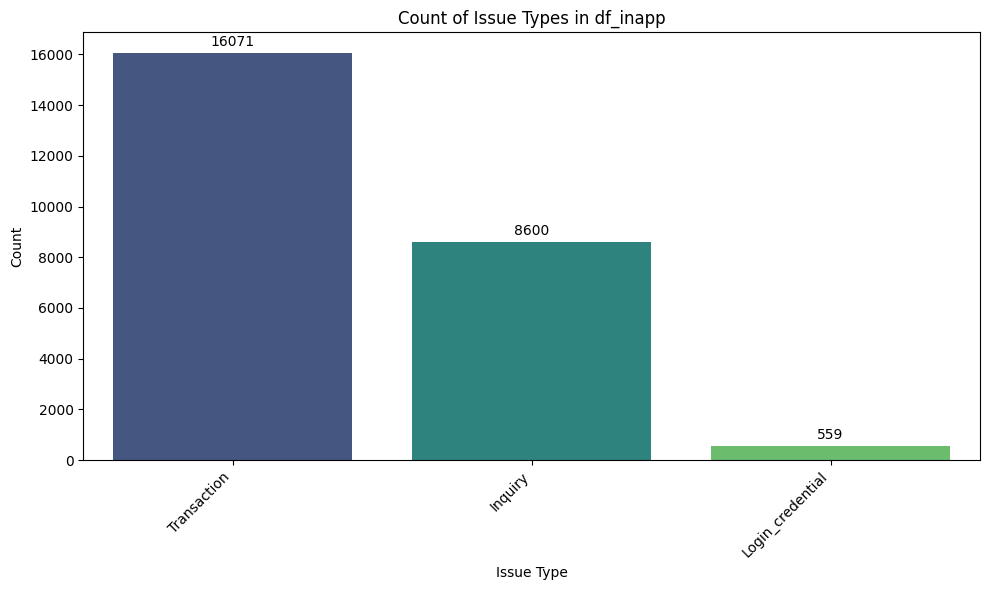

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_inapp, x='Issue_Type', hue='Issue_Type', palette='viridis', legend=False)
plt.title('Count of Issue Types in df_inapp')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## inapp_churn_analysis_prep

### Subtask:
Replicate the churn risk identification for `df_inapp`.


In [29]:
df_inapp['is_churn_risk'] = df_inapp['Wallet last updated date'] <= df_inapp['Created Date']

max_date_inapp = df_inapp['Created Date'].max()

df_inapp.loc[df_inapp['is_churn_risk'] == True, 'days_since_created_if_churn'] = (max_date_inapp - df_inapp['Wallet last updated date']).dt.days

bins = [0, 10, 30, 60, float('inf')]
labels = ['0-10', '11-30', '31-60', '60+']

df_inapp['churn_days_category'] = pd.cut(df_inapp['days_since_created_if_churn'], bins=bins, labels=labels, right=True, include_lowest=True)
df_inapp['churn_days_category'] = df_inapp['churn_days_category'].astype(str)  # Convert to string for better display
display(df_inapp[df_inapp['is_churn_risk'] == True][['Created Date', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category']].head())
display(df_inapp['churn_days_category'].value_counts(dropna=False))

/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/ipykernel_8848/3023541088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inapp['is_churn_risk'] = df_inapp['Wallet last updated date'] <= df_inapp['Created Date']
/var/folders/lr/x5sgkxkn0w3bnhpw6brxfm0m0000gn/T/ipykernel_8848/3023541088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inapp['churn_days_category'] = pd.cut(df_inapp['days_since_created_if_churn'], bins=bins, labels=labels, right=True, include_lowest=True)
/var/folders/lr/x5sgkxk

,Created Date,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category
2636,2026-02-02 01:50:01,2026-02-02 00:07:30,True,14.0,11-30
2696,2026-02-02 08:34:46,2026-01-29 08:48:55,True,18.0,11-30
2737,2026-02-02 09:20:30,2026-01-26 11:11:47,True,21.0,11-30
2752,2026-02-02 09:36:31,2026-01-31 13:57:03,True,16.0,11-30
2899,2026-02-02 11:14:49,2026-02-01 22:27:35,True,15.0,11-30


churn_days_category
nan      21514
0-10      1934
60+        852
11-30      755
31-60      175
Name: count, dtype: int64

**Reasoning**:
Now that `df_inapp` has the churn risk columns, I will create `df_churn_risk_inapp` by filtering `df_inapp` for rows where `is_churn_risk` is `True`, selecting relevant columns, and then display its head to verify the new DataFrame.



In [30]:
df_churn_risk_inapp = df_inapp[df_inapp['is_churn_risk'] == True][['Created Date','Account_id','Gender','Age','serviceName', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category', 'Issue_Type']].copy()
display(df_churn_risk_inapp.head())

,Created Date,Account_id,Gender,Age,serviceName,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category,Issue_Type
2636,2026-02-02 01:50:01,13468516,M,16.0,Ncell Topup,2026-02-02 00:07:30,True,14.0,11-30,Transaction
2696,2026-02-02 08:34:46,696258,M,58.0,eSewa load from Nepal Investment Bank Ltd.,2026-01-29 08:48:55,True,18.0,11-30,Transaction
2737,2026-02-02 09:20:30,9073533,M,22.0,Send Money,2026-01-26 11:11:47,True,21.0,11-30,Transaction
2752,2026-02-02 09:36:31,4047846,F,21.0,Send Money,2026-01-31 13:57:03,True,16.0,11-30,Transaction
2899,2026-02-02 11:14:49,292073,M,29.0,NTC Recruitment,2026-02-01 22:27:35,True,15.0,11-30,Transaction


In [31]:
df_churn_risk_inapp.to_csv(r'/Users/daviddangol/Desktop/CSE /inapp/df_churn_risk_inapp_till17.csv', index=False)
print('DataFrame df_churn_risk_inapp saved to df_churn_risk_inapp.csv')

DataFrame df_churn_risk_inapp saved to df_churn_risk_inapp.csv


**Reasoning**:
To visualize the distribution of churn days categories for `df_churn_risk_inapp`, I will create a count plot using `seaborn` and `matplotlib`, including annotations to show the exact counts for each category, as specified in the subtask.



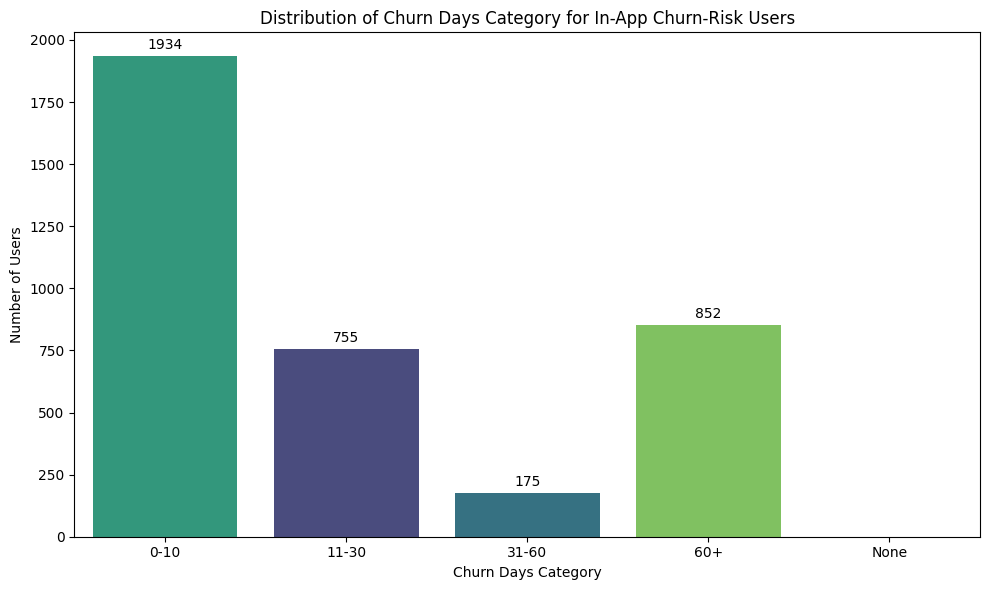

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_churn_risk_inapp, x='churn_days_category', hue='churn_days_category', palette='viridis', legend=False, order=['0-10', '11-30', '31-60', '60+', None])
plt.title('Distribution of Churn Days Category for In-App Churn-Risk Users')
plt.xlabel('Churn Days Category')
plt.ylabel('Number of Users')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the trend of churn-risk users over time for `df_inapp`, I will group `df_churn_risk_inapp` by the date part of 'Created Date', count the number of churn events for each date, and then create a line plot using `seaborn`.



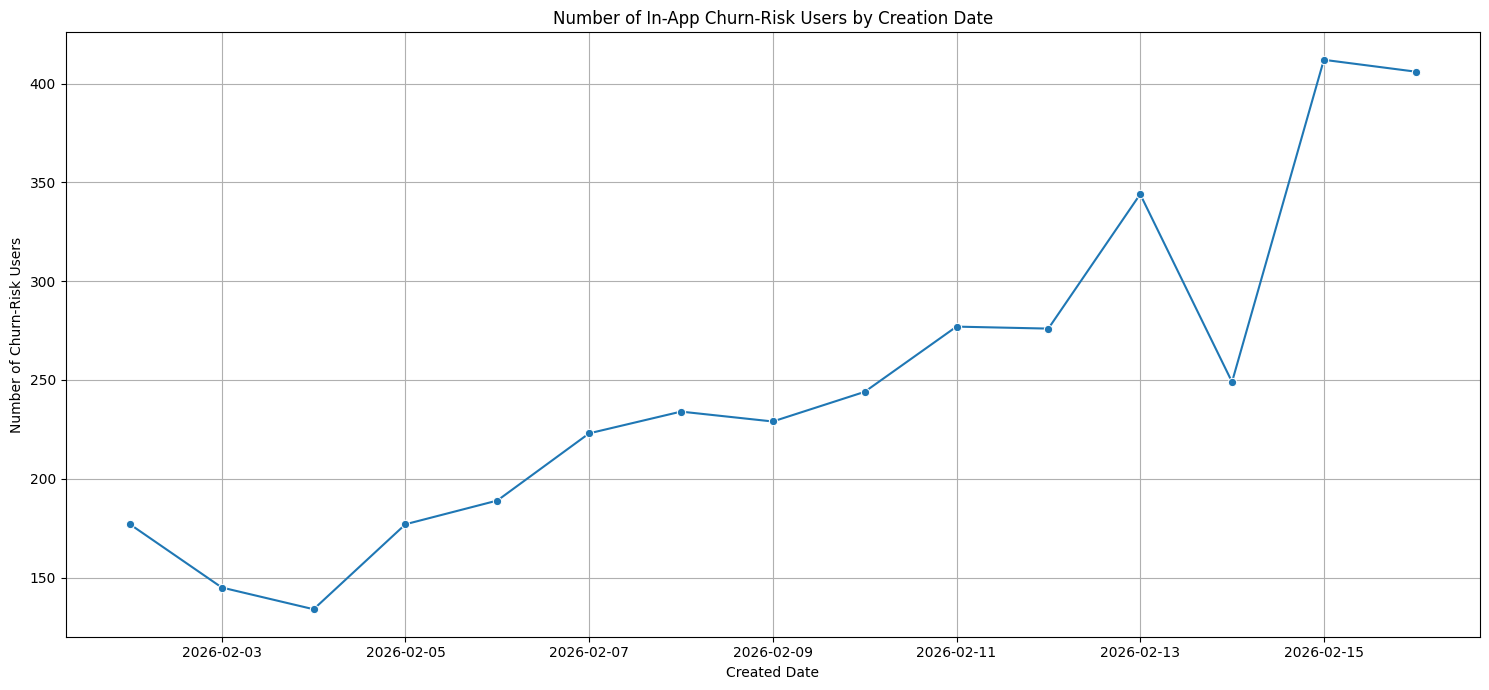

In [33]:
churn_by_creation_date_inapp = df_churn_risk_inapp.groupby(df_churn_risk_inapp['Created Date'].dt.date).size().reset_index(name='Churn Count')
churn_by_creation_date_inapp['Created Date'] = pd.to_datetime(churn_by_creation_date_inapp['Created Date'])

plt.figure(figsize=(15, 7))
sns.lineplot(data=churn_by_creation_date_inapp, x='Created Date', y='Churn Count', marker='o')
plt.title('Number of In-App Churn-Risk Users by Creation Date')
plt.xlabel('Created Date')
plt.ylabel('Number of Churn-Risk Users')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze the distribution of `Issue_Type` within `df_churn_risk_inapp`, I will calculate the value counts and their corresponding percentages, then combine these into a summary DataFrame and display it, as specified in the task.



In [34]:
issue_type_counts_inapp = df_churn_risk_inapp['Issue_Type'].value_counts()
issue_type_percentage_inapp = df_churn_risk_inapp['Issue_Type'].value_counts(normalize=True) * 100

issue_type_summary_inapp = pd.DataFrame({
    'Count': issue_type_counts_inapp,
    'Percentage': issue_type_percentage_inapp
})

display(issue_type_summary_inapp.round(2))

,Count,Percentage
Issue_Type,,
Inquiry,2215,59.61
Transaction,1286,34.61
Login_credential,215,5.79


In [35]:
df_churn_inquiry_serviceName_inapp = df_churn_risk_inapp[df_churn_risk_inapp['Issue_Type'] == 'Inquiry'][['Account_id','Gender','Age','serviceName', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category', 'Issue_Type']]
display(df_churn_inquiry_serviceName_inapp.head())
print(f"Shape of the DataFrame: {df_churn_inquiry_serviceName_inapp.shape}")

,Account_id,Gender,Age,serviceName,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category,Issue_Type
26927,13468516,M,16.0,Send Money,2026-02-02 00:07:30,True,14.0,11-30,Inquiry
26937,13600973,M,22.0,KYC,2026-02-01 19:45:28,True,15.0,11-30,Inquiry
26948,12839883,M,32.0,KYC,2025-09-18 08:44:52,True,151.0,60+,Inquiry
26963,13597510,F,42.0,KYC,2026-02-01 10:40:49,True,15.0,11-30,Inquiry
26970,2229136,M,38.0,KYC,2026-01-22 01:21:57,True,25.0,11-30,Inquiry


Shape of the DataFrame: (2215, 9)


In [36]:
df_churn_inquiry_serviceName_inapp.to_csv(r'/Users/daviddangol/Desktop/CSE /inapp/df_churn_inquiry_serviceName_inapp_till17.csv', index=False)
print('DataFrame df_churn_inquiry_serviceName_inapp saved to df_churn_inquiry_serviceName_inapp.csv')

DataFrame df_churn_inquiry_serviceName_inapp saved to df_churn_inquiry_serviceName_inapp.csv


# Task
## fund_transfer_issue_type_countplot

### Subtask:
Create a count plot for 'Issue_Type' in `df_fund_transfer` to visualize its distribution, with annotations for better visual clarity.

## fund_transfer_issue_type_countplot

### Subtask:
Create a count plot for 'Issue_Type' in `df_fund_transfer` to visualize its distribution, with annotations for better visual clarity.


**Reasoning**:
To visualize the distribution of 'Issue_Type' in `df_fund_transfer`, I will create a count plot using `seaborn` and `matplotlib`, following all instructions provided for clarity and readability.



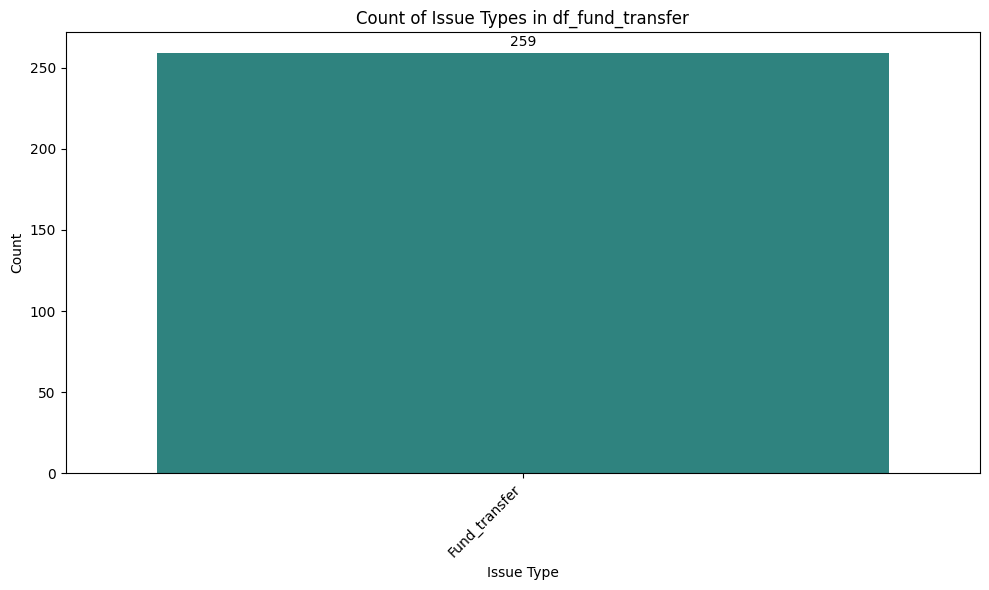

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_fund_transfer, x='Issue_Type', hue='Issue_Type', palette='viridis', legend=False)
plt.title('Count of Issue Types in df_fund_transfer')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## fund_transfer_churn_analysis_prep

### Subtask:
Replicate the churn risk identification for `df_fund_transfer`.

**Reasoning**:
To ensure that the churn risk calculations for `df_fund_transfer` are performed on a copy to avoid `SettingWithCopyWarning` and to correctly compute `is_churn_risk`, `days_since_created_if_churn`, and `churn_days_category`, I will first create a copy of the dataframe and then apply the necessary datetime and categorization logic.



In [37]:
df_fund_transfer = df_fund_transfer.copy()

df_fund_transfer['is_churn_risk'] = df_fund_transfer['Wallet last updated date'] <= df_fund_transfer['Created Date']

max_date_fund_transfer = df_fund_transfer['Created Date'].max()

df_fund_transfer.loc[df_fund_transfer['is_churn_risk'] == True, 'days_since_created_if_churn'] = (max_date_fund_transfer - df_fund_transfer['Wallet last updated date']).dt.days

bins = [0, 10, 30, 60, float('inf')]
labels = ['0-10', '11-30', '31-60', '60+']

df_fund_transfer['churn_days_category'] = pd.cut(df_fund_transfer['days_since_created_if_churn'], bins=bins, labels=labels, right=True, include_lowest=True)

display(df_fund_transfer[df_fund_transfer['is_churn_risk'] == True][['Created Date', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category']].head())
display(df_fund_transfer['churn_days_category'].value_counts(dropna=False))

,Created Date,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category


churn_days_category
NaN      259
0-10       0
11-30      0
31-60      0
60+        0
Name: count, dtype: int64

**Reasoning**:
Since the previous step successfully calculated the churn risk columns, I will now create `df_churn_risk_fund_transfer` by filtering `df_fund_transfer` for rows where `is_churn_risk` is `True`, selecting relevant columns, and then display its head to verify the new DataFrame. This will be an empty DataFrame given the previous output.



In [38]:
df_churn_risk_fund_transfer = df_fund_transfer[df_fund_transfer['is_churn_risk'] == True][['Created Date','Account_id','Gender','Age','serviceName', 'Wallet last updated date', 'is_churn_risk', 'days_since_created_if_churn', 'churn_days_category', 'Issue_Type']].copy()
display(df_churn_risk_fund_transfer.head())


,Created Date,Account_id,Gender,Age,serviceName,Wallet last updated date,is_churn_risk,days_since_created_if_churn,churn_days_category,Issue_Type


## fund_transfer_churn_days_category_plot

### Subtask:
Generate a count plot for `churn_days_category` in `df_churn_risk_fund_transfer`.


**Reasoning**:
To visualize the distribution of churn days categories for `df_churn_risk_fund_transfer`, I will create a count plot using `seaborn` and `matplotlib`, as specified in the subtask. Although the DataFrame is empty, the plot structure will be generated.



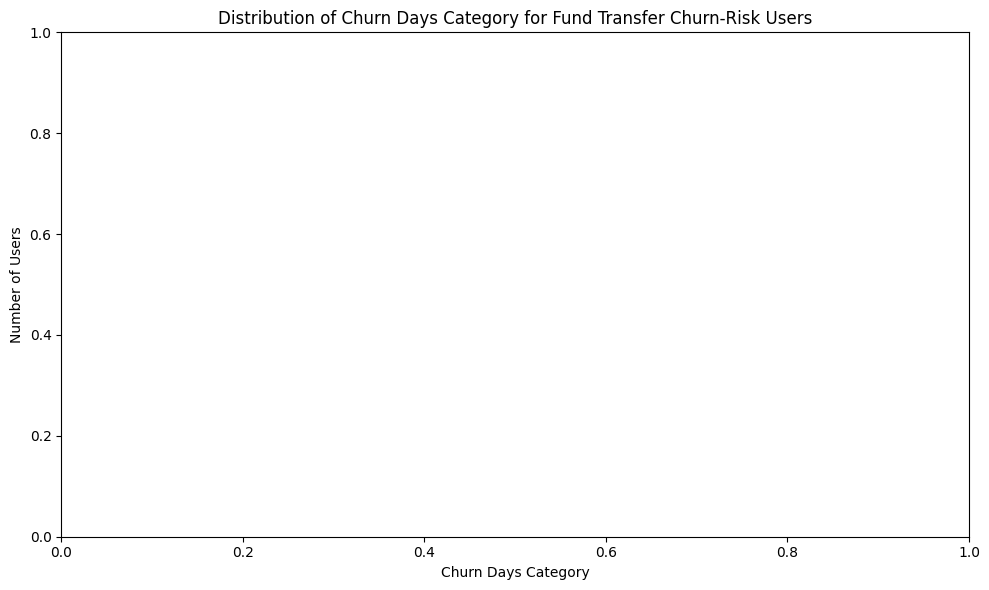

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_churn_risk_fund_transfer, x='churn_days_category', hue='churn_days_category', palette='viridis', legend=False, order=['0-10', '11-30', '31-60', '60+', None])
plt.title('Distribution of Churn Days Category for Fund Transfer Churn-Risk Users')
plt.xlabel('Churn Days Category')
plt.ylabel('Number of Users')

# Adding annotations would not show anything for an empty dataframe, but if data existed, this would apply.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

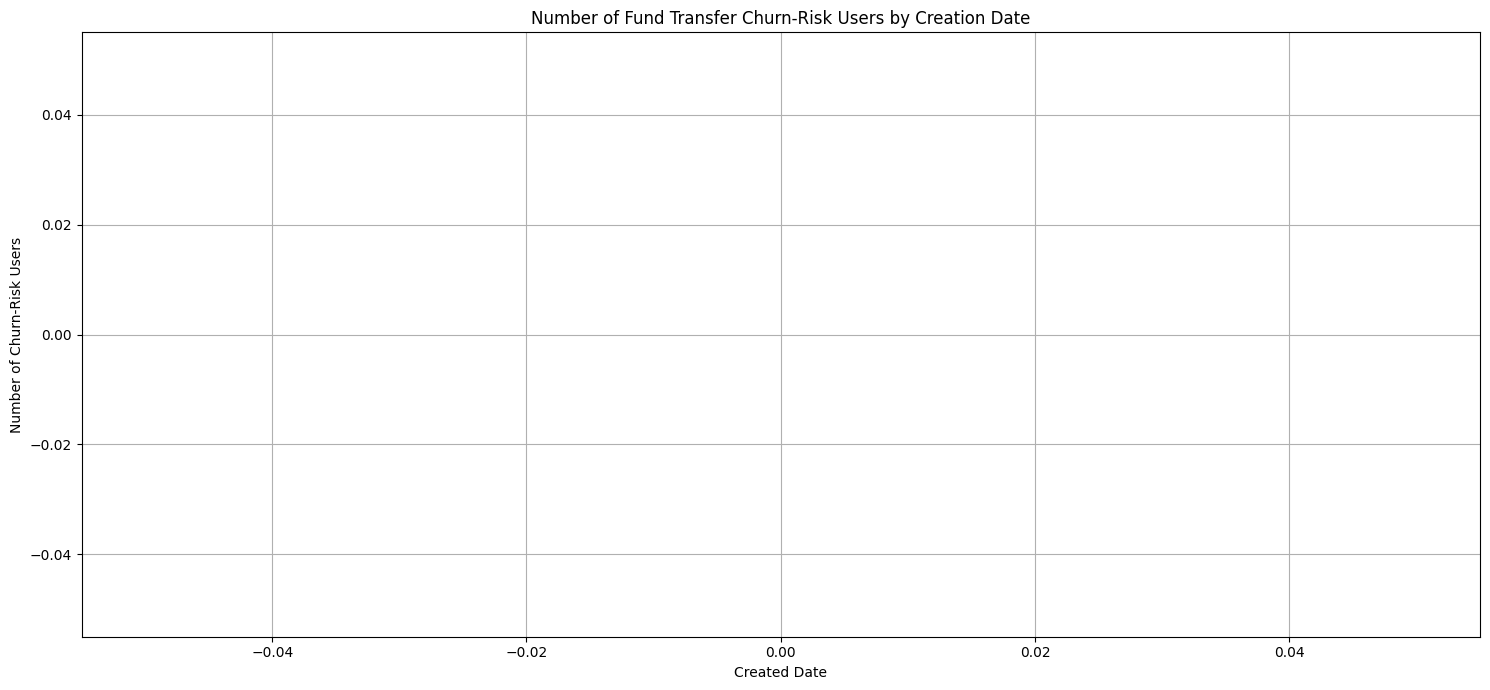

In [39]:
churn_by_creation_date_fund_transfer = df_churn_risk_fund_transfer.groupby(df_churn_risk_fund_transfer['Created Date'].dt.date).size().reset_index(name='Churn Count')
churn_by_creation_date_fund_transfer['Created Date'] = pd.to_datetime(churn_by_creation_date_fund_transfer['Created Date'])

plt.figure(figsize=(15, 7))
sns.lineplot(data=churn_by_creation_date_fund_transfer, x='Created Date', y='Churn Count', marker='o')
plt.title('Number of Fund Transfer Churn-Risk Users by Creation Date')
plt.xlabel('Created Date')
plt.ylabel('Number of Churn-Risk Users')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
issue_type_counts_fund_transfer = df_churn_risk_fund_transfer['Issue_Type'].value_counts()
issue_type_percentage_fund_transfer = df_churn_risk_fund_transfer['Issue_Type'].value_counts(normalize=True) * 100

issue_type_summary_fund_transfer = pd.DataFrame({
    'Count': issue_type_counts_fund_transfer,
    'Percentage': issue_type_percentage_fund_transfer
})

display(issue_type_summary_fund_transfer.round(2))

,Count,Percentage
Issue_Type,,
